In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

In [2]:
PATH = "Jeux_de_donnees/aclImdb"
sub_dossiers = ['train', 'test']
target = ['pos', 'neg']
    
X = []
y = []

In [3]:
for sub_dossier in sub_dossiers:
    neg_files = os.listdir(os.path.join(PATH, sub_dossier, target[1]))
    for neg_file in neg_files:
        with open(os.path.join(PATH, sub_dossier, target[1], neg_file), encoding='ascii', errors='ignore') as f:
                X.append(f.read())
                # On ajouter 1 à notre liste target pour chaque spam lu dans la liste data.
                y.append(0)

    pos_files = os.listdir(os.path.join(PATH,sub_dossier, target[0]))
    for pos_file in pos_files:
        with open(os.path.join(PATH, sub_dossier, target[0], pos_file), encoding='ascii', errors='ignore') as f:
                X.append(f.read())
                # On ajouter 1 à notre liste target pour chaque spam lu dans la liste data.
                y.append(1)

In [4]:
X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size=0.10, random_state=42)
#essaye s/test_size=0.05

In [7]:
X_2[:5]

["I love the book. It's full of passion, romance, tension... and the movie drags along taking two spunky stars with it. Kylie Minogue was already a major star in Australia, having starred in Neighbours and releasing her first single. The decision to cast her in The Delinquents was surely a marketing ploy. For me, it didn't pay off.<br /><br />Kylie may have been great in Neighbours, but she was far too sweet and innocent to play the feisty Lola... and, she wasn't of Asian descent as Lola was. Charlie Schlatter was an excellent Brownie, but there was no chemistry between him and Kylie.<br /><br />By and large, the movie was boring. It dragged on, it lacked the passion of the book, it focused heavily on Kylie and in general, was completely disappointing.",
 "Leonard Maltin compared this film to a Mel Brooks comedy. He was far too kind to Ms. Rivers, and far too cruel to Mr. Brooks. Not even the raunchiest Mel Brooks films are this tasteless, and at least they're genuinely funny. This pic

In [26]:
import nltk
from nltk.corpus import stopwords

count_vec = CountVectorizer(stop_words=stopwords.words('english'))
X_counts = count_vec.fit_transform(X_2)
print(X_counts)

  (0, 20752)	1
  (0, 4306)	2
  (0, 13947)	1
  (0, 25332)	2
  (0, 29533)	1
  (0, 34688)	1
  (0, 23058)	2
  (0, 10598)	1
  (0, 1385)	1
  (0, 34329)	1
  (0, 36112)	1
  (0, 32785)	1
  (0, 32982)	1
  (0, 19601)	4
  (0, 22435)	1
  (0, 1399)	1
  (0, 21162)	1
  (0, 32954)	1
  (0, 2587)	1
  (0, 32978)	1
  (0, 23611)	2
  (0, 28582)	1
  (0, 13130)	1
  (0, 31632)	1
  (0, 8993)	1
  :	:
  (4999, 27926)	1
  (4999, 11265)	1
  (4999, 3072)	1
  (4999, 17401)	1
  (4999, 12382)	1
  (4999, 7593)	1
  (4999, 16121)	1
  (4999, 11398)	1
  (4999, 26905)	1
  (4999, 11514)	1
  (4999, 10113)	1
  (4999, 36850)	2
  (4999, 29025)	1
  (4999, 37114)	1
  (4999, 13765)	1
  (4999, 17692)	1
  (4999, 22418)	1
  (4999, 28150)	1
  (4999, 13716)	1
  (4999, 11533)	1
  (4999, 20432)	1
  (4999, 9407)	1
  (4999, 7539)	1
  (4999, 8226)	1
  (4999, 33491)	1


In [27]:
X_counts = pd.DataFrame(X_counts.toarray(),
                        columns = list(count_vec.vocabulary_.keys()))

In [8]:
X_counts

,love,book,full,passion,romance,tension,movie,drags,along,taking,...,infirmed,minimally,reawakened,frankness,enchrenched,liposuction,derrek,conservatory,cretin,studmuffins
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
cluster = [i for i in range (2,11)]
inertie = []
silhouette = []

for i in cluster :
    k = i
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_counts)
    
    inertie.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_counts, kmeans.labels_))
    
    print('clustering.inertia_ : ', kmeans.inertia_,
         'silhouette_score : ', silhouette_score(X_counts, kmeans.labels_))

clustering.inertia_ :  977013.8712448109 silhouette_score :  0.24015417179458629
clustering.inertia_ :  941646.4110984954 silhouette_score :  0.14266619934396835
clustering.inertia_ :  923318.2184934338 silhouette_score :  0.05462913224799877
clustering.inertia_ :  912669.7937893849 silhouette_score :  0.04814084891138042
clustering.inertia_ :  903873.5759276979 silhouette_score :  0.03917287028109754
clustering.inertia_ :  897309.6654563491 silhouette_score :  0.008045736196453086
clustering.inertia_ :  887401.821485953 silhouette_score :  0.010131146809054015
clustering.inertia_ :  885945.9785323483 silhouette_score :  0.020807273038269885
clustering.inertia_ :  884590.9054084461 silhouette_score :  0.02228717289699941


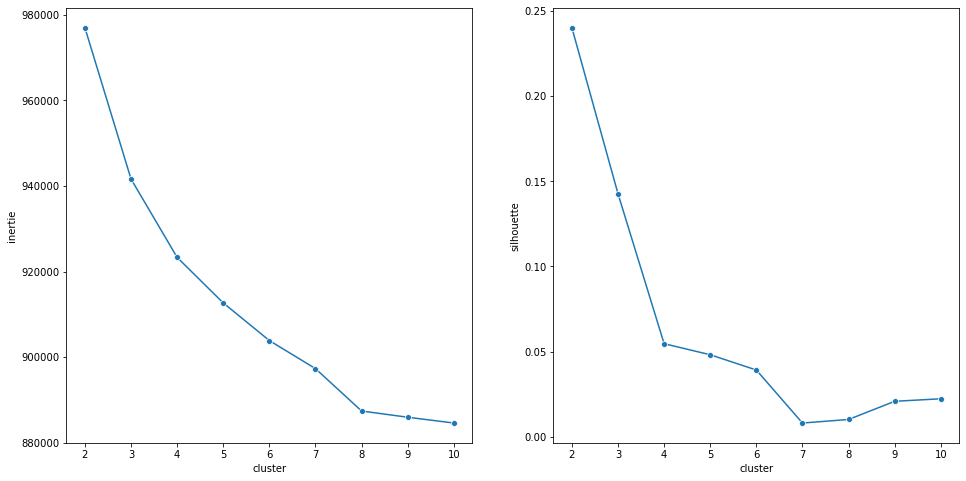

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({'cluster':cluster, 'inertie': inertie, 'silhouette': silhouette})
plt.figure(figsize=[16,8])

plt.subplot(121)
sns.lineplot(data=data, x="cluster", y="inertie", marker='o')

plt.subplot(122)
sns.lineplot(data=data, x="cluster", y="silhouette", marker='o');


In [30]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_counts)

KMeans(n_clusters=6, random_state=42)

In [31]:
X_counts['cluster_']=kmeans.predict(X_counts)

#### Je regarde quel sont les dix mot qui caractérise le plus chacun des clusters

In [32]:
print("Les dix mot qui caractérise le plus chacun des clusters")
for i in range(1,5):
    print("Cluster ", i-1, ": ", 
         X_counts[:-1][X_counts.cluster_==i-1].mean().sort_values(ascending=False).head(10).index.to_list(), '\n')

Les dix mot qui caractérise le plus chacun des clusters
Cluster  0 :  ['directs', 'codd', 'corral', 'silvana', 'descended', 'silencing', 'voorhees', 'malaise', 'constellations', 'yey'] 

Cluster  1 :  ['directs', 'descended', 'codd', 'corral', 'cluster_', 'silvana', 'malaise', '1600', 'constellations', 'voorhees'] 

Cluster  2 :  ['cluster_', 'codd', 'directs', 'descended', 'corral', 'silvana', 'malaise', 'constellations', 'tallin', 'yey'] 

Cluster  3 :  ['descended', 'cluster_', 'directs', 'corral', 'silvana', 'malaise', 'doubted', 'codd', 'tallin', 'yey'] 

Cluster  4 :  ['directs', 'cluster_', 'descended', 'codd', 'corral', 'silvana', 'voorhees', 'yey', 'malaise', 'constellations'] 

Cluster  5 :  ['directs', 'cluster_', 'descended', 'corral', 'silvana', 'malaise', 'yey', 'codd', 'urmila', 'voorhees'] 



In [33]:
# Je commence par récupérer les centre de gravité dans un DataFrame
# et je les répettes pour chaques obs de départ

cluster_centre = pd.DataFrame(kmeans.cluster_centers_[kmeans.labels_],
                      columns=X_counts.columns[:-1])

In [34]:
#afficher df qui contiens les centres de gravite
cluster_centre

,love,book,full,passion,romance,tension,movie,drags,along,taking,...,infirmed,minimally,reawakened,frankness,enchrenched,liposuction,derrek,conservatory,cretin,studmuffins
0,0.001523,0.003807,3.806624e-04,-2.602085e-18,1.141987e-03,3.806624e-04,-5.204170e-18,-2.602085e-18,0.000381,0.000761,...,-2.602085e-18,3.806624e-04,3.806624e-04,0.001142,-5.204170e-18,-2.602085e-18,6.288373e-18,7.613247e-04,-2.602085e-18,3.806624e-04
1,0.001523,0.003807,3.806624e-04,-2.602085e-18,1.141987e-03,3.806624e-04,-5.204170e-18,-2.602085e-18,0.000381,0.000761,...,-2.602085e-18,3.806624e-04,3.806624e-04,0.001142,-5.204170e-18,-2.602085e-18,6.288373e-18,7.613247e-04,-2.602085e-18,3.806624e-04
2,0.001523,0.003807,3.806624e-04,-2.602085e-18,1.141987e-03,3.806624e-04,-5.204170e-18,-2.602085e-18,0.000381,0.000761,...,-2.602085e-18,3.806624e-04,3.806624e-04,0.001142,-5.204170e-18,-2.602085e-18,6.288373e-18,7.613247e-04,-2.602085e-18,3.806624e-04
3,0.001523,0.003807,3.806624e-04,-2.602085e-18,1.141987e-03,3.806624e-04,-5.204170e-18,-2.602085e-18,0.000381,0.000761,...,-2.602085e-18,3.806624e-04,3.806624e-04,0.001142,-5.204170e-18,-2.602085e-18,6.288373e-18,7.613247e-04,-2.602085e-18,3.806624e-04
4,0.010319,0.011257,7.860466e-19,9.380863e-04,3.144186e-18,7.860466e-19,1.876173e-03,9.380863e-04,0.000938,0.001876,...,7.860466e-19,7.860466e-19,7.860466e-19,0.002814,1.572093e-18,9.380863e-04,3.252607e-19,1.572093e-18,7.860466e-19,7.860466e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.001523,0.003807,3.806624e-04,-2.602085e-18,1.141987e-03,3.806624e-04,-5.204170e-18,-2.602085e-18,0.000381,0.000761,...,-2.602085e-18,3.806624e-04,3.806624e-04,0.001142,-5.204170e-18,-2.602085e-18,6.288373e-18,7.613247e-04,-2.602085e-18,3.806624e-04
4996,0.001523,0.003807,3.806624e-04,-2.602085e-18,1.141987e-03,3.806624e-04,-5.204170e-18,-2.602085e-18,0.000381,0.000761,...,-2.602085e-18,3.806624e-04,3.806624e-04,0.001142,-5.204170e-18,-2.602085e-18,6.288373e-18,7.613247e-04,-2.602085e-18,3.806624e-04
4997,0.001523,0.003807,3.806624e-04,-2.602085e-18,1.141987e-03,3.806624e-04,-5.204170e-18,-2.602085e-18,0.000381,0.000761,...,-2.602085e-18,3.806624e-04,3.806624e-04,0.001142,-5.204170e-18,-2.602085e-18,6.288373e-18,7.613247e-04,-2.602085e-18,3.806624e-04
4998,0.001523,0.003807,3.806624e-04,-2.602085e-18,1.141987e-03,3.806624e-04,-5.204170e-18,-2.602085e-18,0.000381,0.000761,...,-2.602085e-18,3.806624e-04,3.806624e-04,0.001142,-5.204170e-18,-2.602085e-18,6.288373e-18,7.613247e-04,-2.602085e-18,3.806624e-04


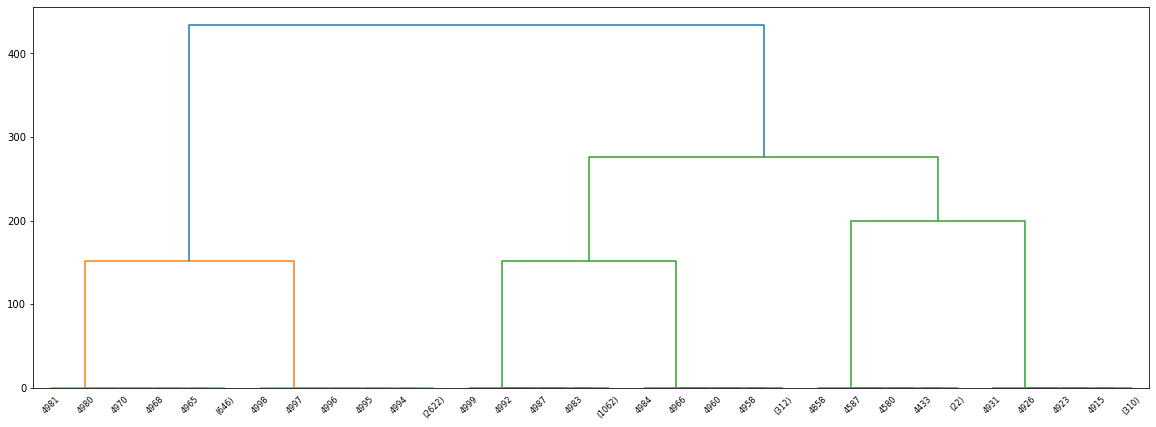

In [35]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(cluster_centre, 'ward')

#trace les clusters 
plt.figure(figsize=(20, 7))
plt.xticks(rotation=90)
#truncate_mode: supprime les niveaux plus profondeurs
#truncate_mode: ça marche en utilisant av param p
dn = hierarchy.dendrogram(Z, truncate_mode='level', p=6)

# Appliquer la transformation tf.idf

In [ ]:
tfIdf_transformer = TfidfTransformer()
X_train_tfidf = tfIdf_transformer.fit_transform(X_counts)
print(X_train_tfidf[0])